In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [75]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [76]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [45]:
# как видно ряды 4 и 6 уже статичные,
# уберем их из списка
tt =all_series.pop("Mean monthly air temperature (Deg. F) Nottingham Castle")
tt =all_series.pop("Daily total female births in California")


Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


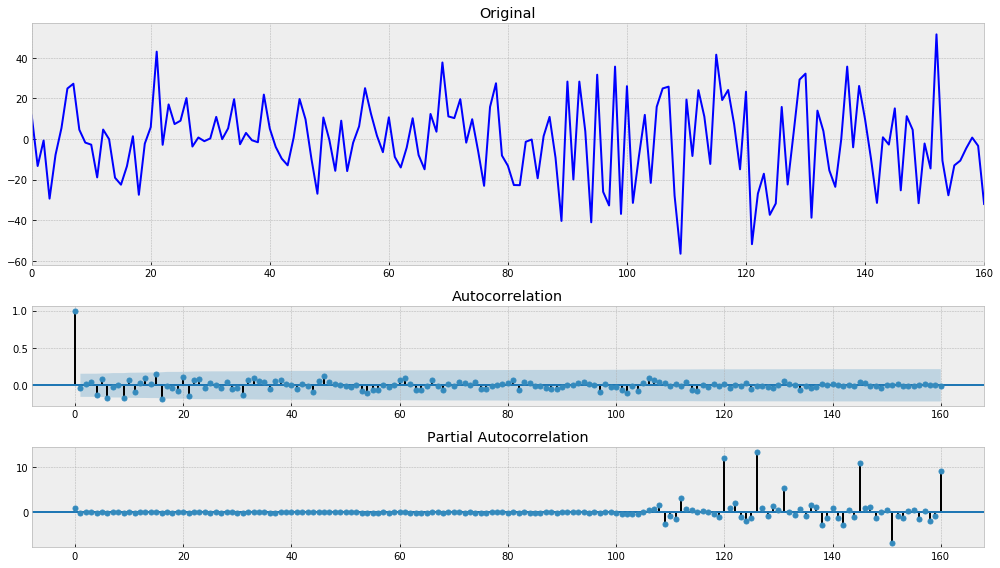

In [131]:
# boxcox и дифференцияация
series = dowjones_closing["Close"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.883404
p-value                         0.002160
#Lags Used                      9.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


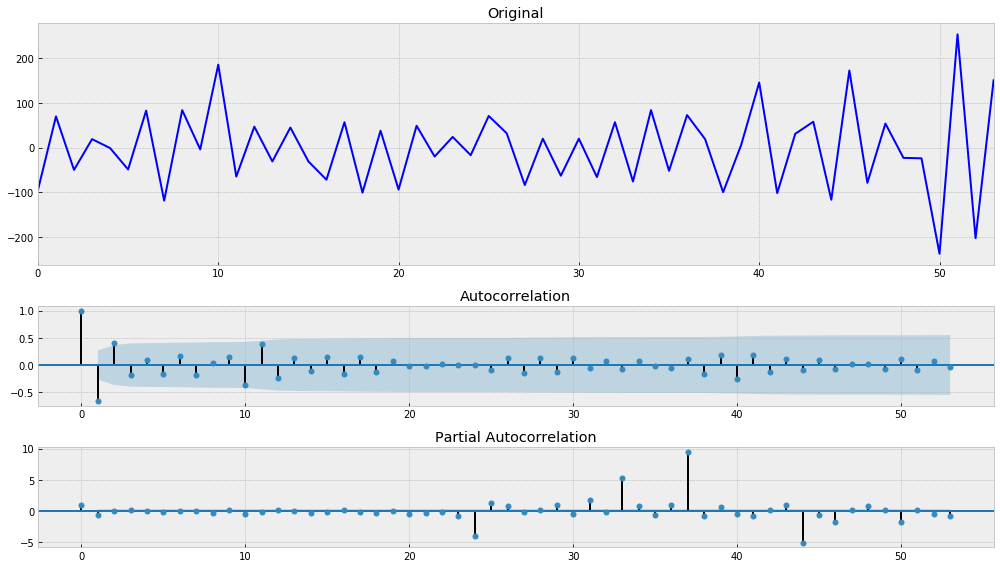

In [135]:
# boxcox и дифференцияация
# убираем сезонность 12 месяцев и 10 месяцев цикличность
series = sales_of_company_x["Count"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
series = pd.Series(series[12:].values - series[:-12].values)
series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -4.615965
p-value                         0.000121
#Lags Used                     12.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


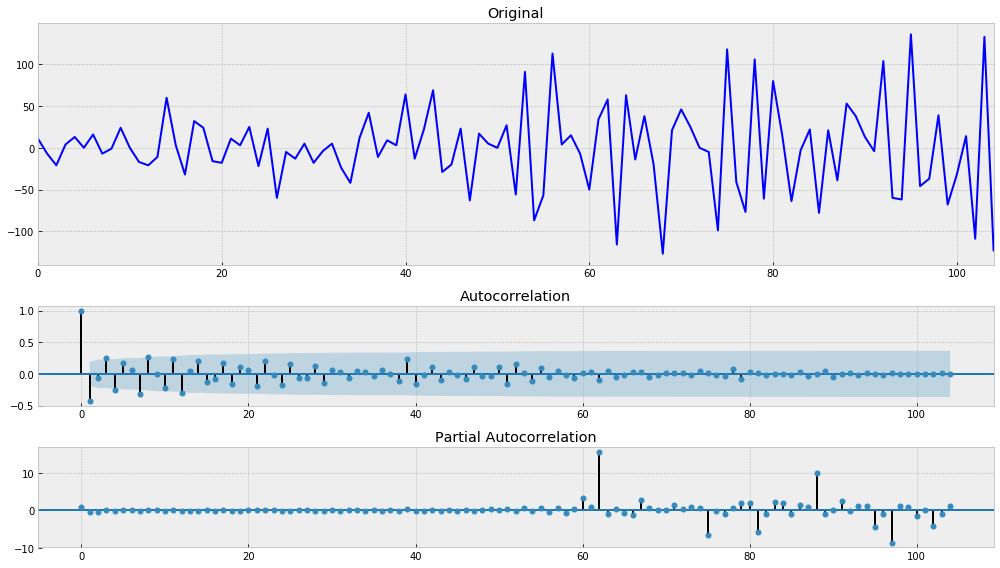

In [136]:
# boxcox и дифференцияация
# убираем сезонность 12 месяцев 
series = robberies_in_boston["Count"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
series = pd.Series(series[12:].values - series[:-12].values)
#series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


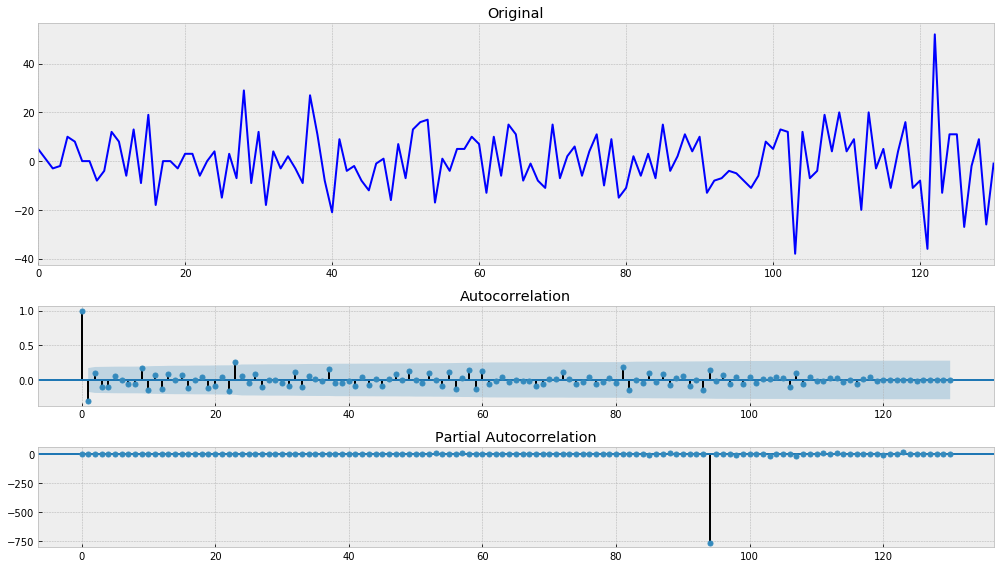

In [137]:
# boxcox и дифференцияация
# убираем сезонность 12 месяцев 
series =  airlines_passengers["Count"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
series = pd.Series(series[12:].values - series[:-12].values)
#series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.862241e+00
p-value                        5.246600e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


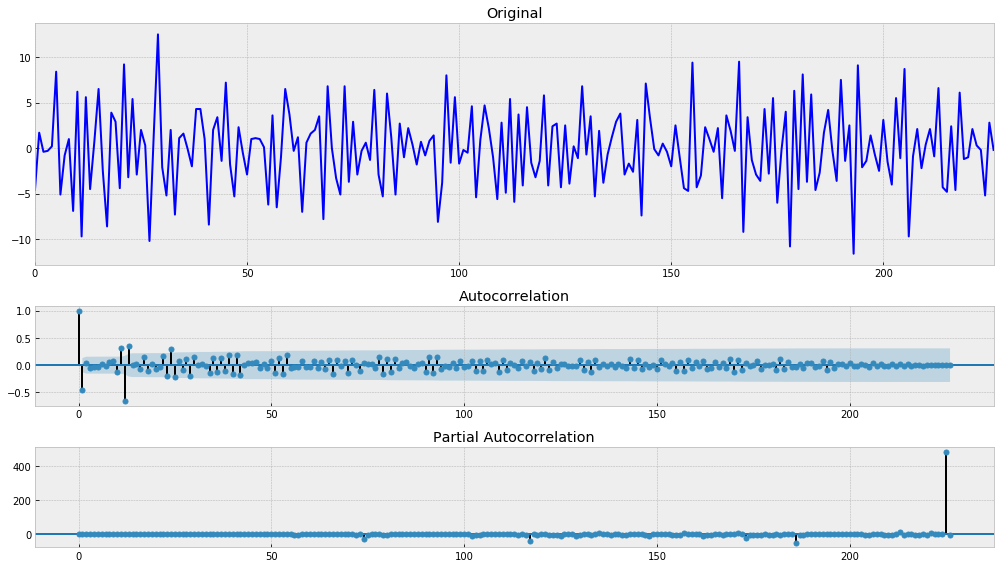

In [139]:
# boxcox и дифференцияация
# убираем сезонность 12 месяцев
series =  mean_monthly_temp["Deg"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
series = pd.Series(series[12:].values - series[:-12].values)
#series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


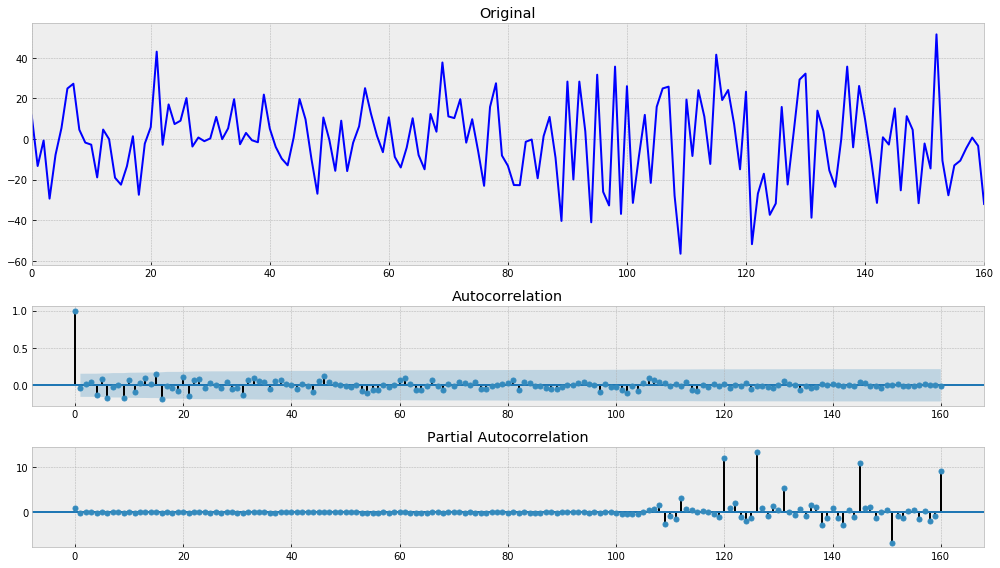

In [140]:
# boxcox и дифференцияация
series =  dowjones_closing["Close"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
#series = pd.Series(series[12:].values - series[:-12].values)
#series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


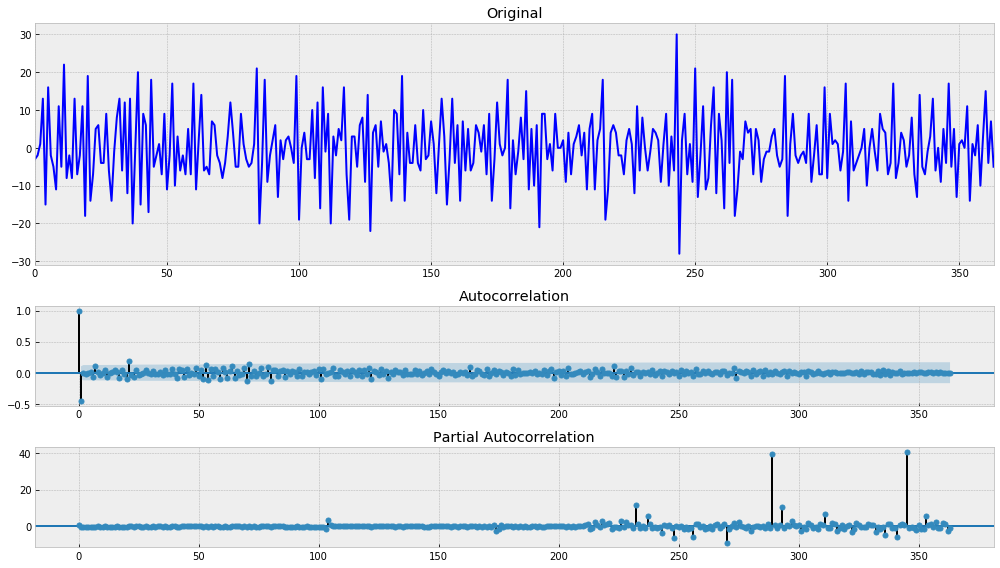

In [145]:
# boxcox и дифференцияация

series =  female_births["Count"]
boxcox(series, 0)
series = pd.Series(series[1:].values - series[:-1].values)
#series = pd.Series(series[12:].values - series[:-12].values)
#series = pd.Series(series[10:].values - series[:-10].values)
tsplot(series)